In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


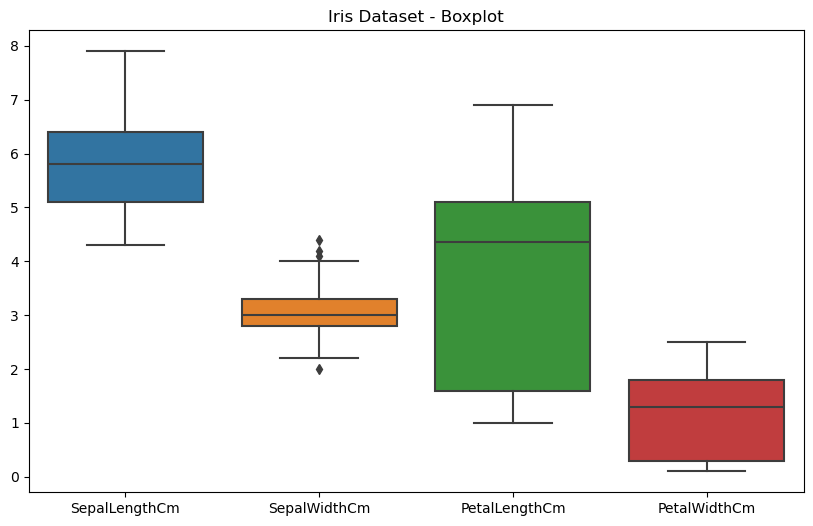

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.drop(columns=["Id"]))  
plt.title("Iris Dataset - Boxplot")
plt.show()

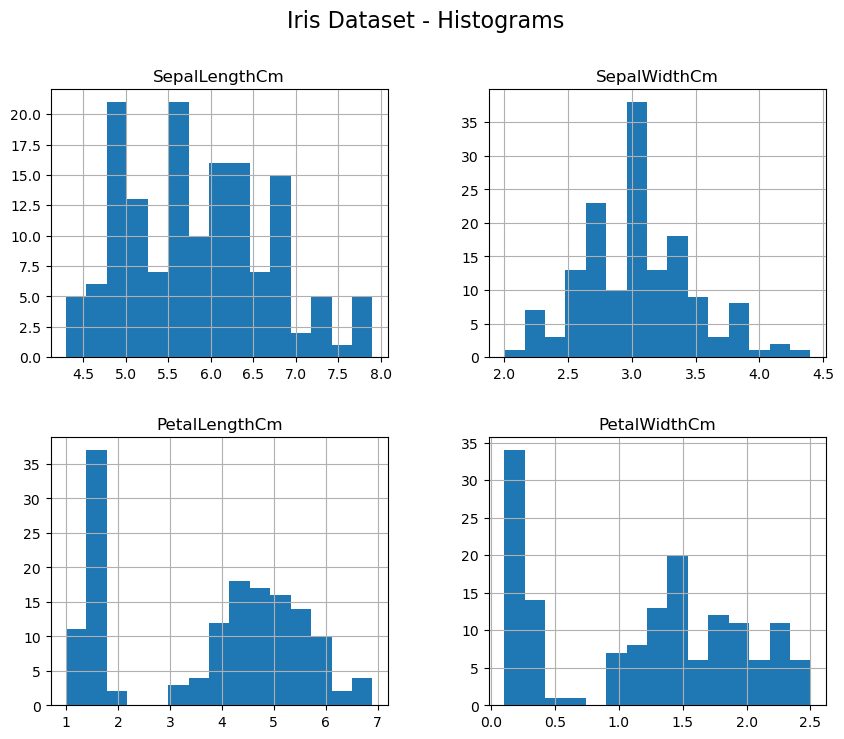

In [10]:
df.drop(columns=["Id"]).hist(figsize=(10,8), bins=15)
plt.suptitle("Iris Dataset - Histograms", fontsize=16)
plt.show()

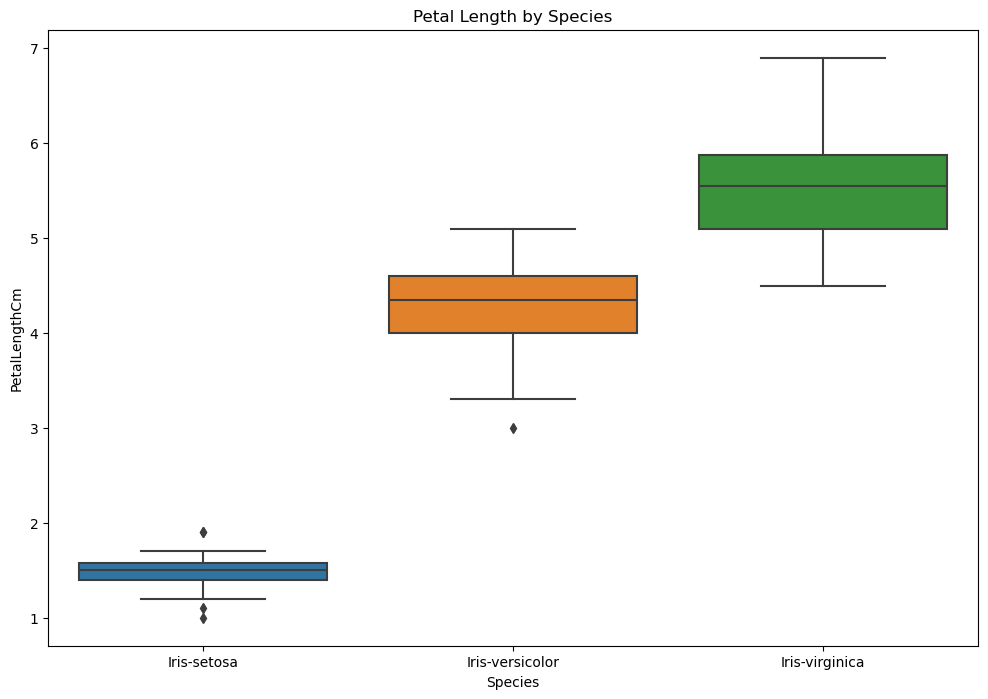

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Species", y="PetalLengthCm", data=df)
plt.title("Petal Length by Species")
plt.show()

C:\Users\HUAWEI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


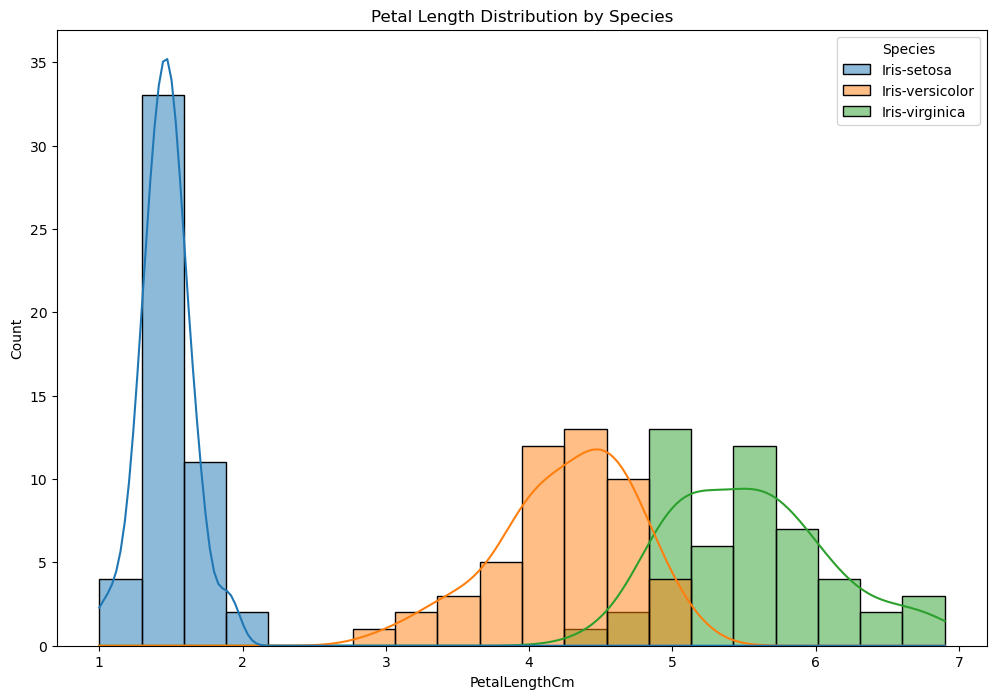

In [12]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="PetalLengthCm", hue="Species", kde=True, bins=20)
plt.title("Petal Length Distribution by Species")
plt.show()

C:\Users\HUAWEI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HUAWEI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HUAWEI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HUAWEI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

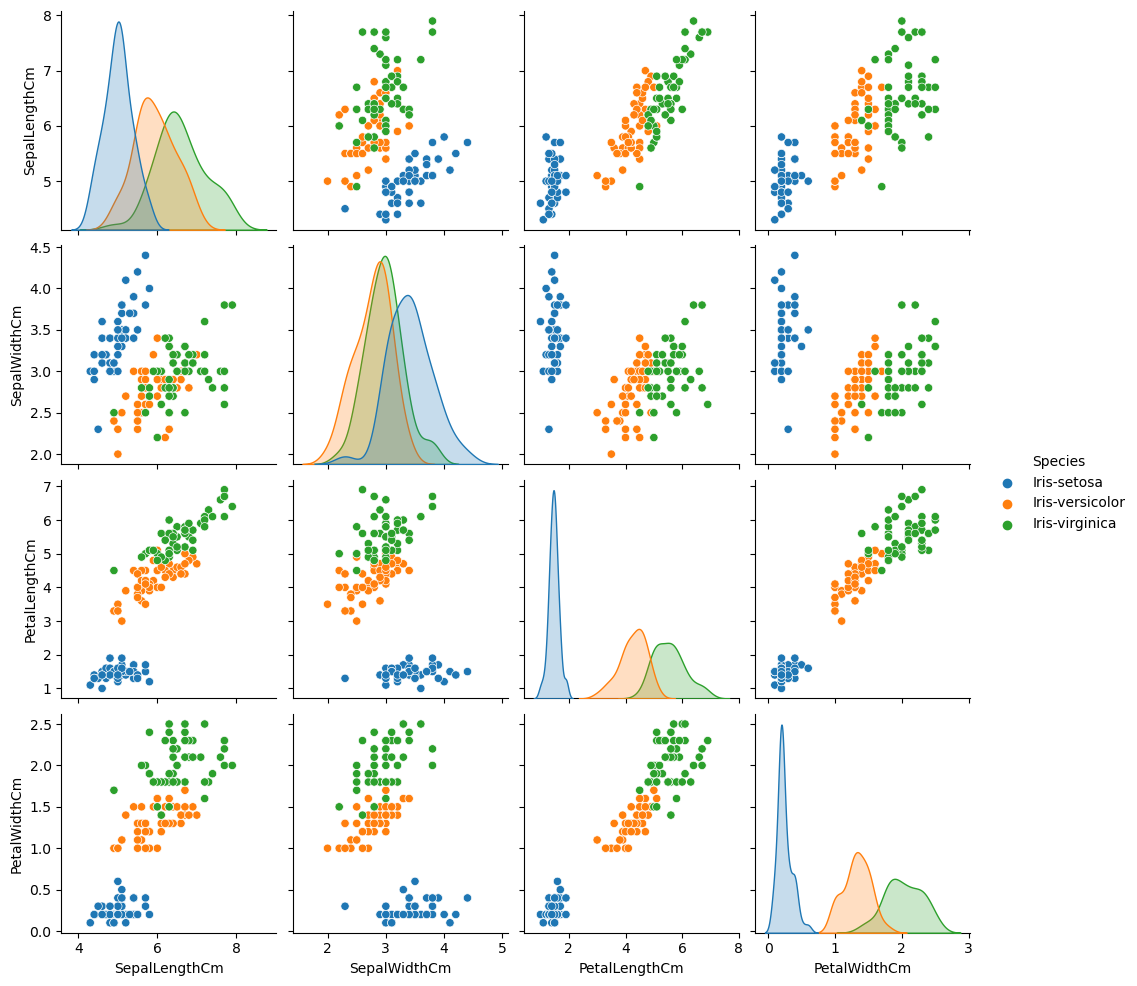

In [13]:
sns.pairplot(df.drop(columns=["Id"]), hue="Species", diag_kind="kde")
plt.show()

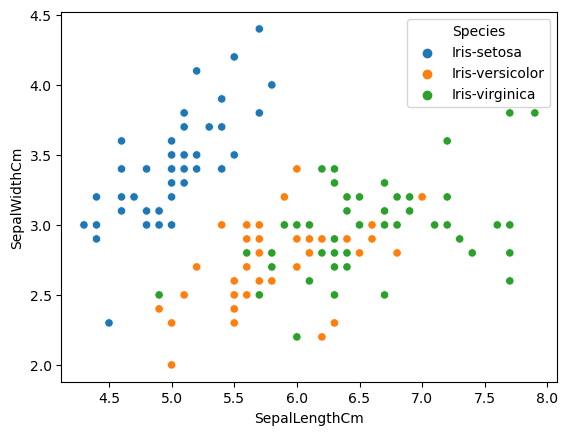

In [15]:
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df)
plt.show()


In [16]:
df= df.drop("Id", axis=1)

In [17]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder=LabelEncoder()
df["Species"]=label_encoder.fit_transform(df["Species"])

In [21]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [23]:
df["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [24]:
X=df.drop("Species",axis=1)
y=df["Species"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=15)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
gnb=GaussianNB()

In [32]:
gnb.fit(X_train_scaled,y_train)
y_pred=gnb.predict(X_test_scaled)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [36]:
print("confusion matrix:\n", confusion_matrix(y_pred,y_test))
print("accuracy score:", accuracy_score(y_pred,y_test))
print("classifiaction report:", classification_report(y_pred,y_test))

confusion matrix:
 [[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]
accuracy score: 1.0
classifiaction report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [37]:
from sklearn.svm import SVC


In [38]:
svm_clf = SVC(kernel="linear")   
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

In [39]:
y_pred_svm = svm_clf.predict(X_test)


In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Confusion Matrix:
 [[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]
Accuracy Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

